In [6]:

import heat_exchanger
from constants import *

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# increase figure size
plt.rcParams["figure.figsize"] = (10, 6)


In [7]:
df = pd.read_csv('2024designs.csv')


In [8]:

def comptute_designs(df):
    mdot_colds = np.zeros(len(df))
    mdot_hots = np.zeros(len(df))
    Qdots = np.zeros(len(df))
    effs = np.zeros(len(df))

    hot_passes = np.zeros(len(df))
    cold_passes = np.zeros(len(df))

    for i, row in enumerate(df.iterrows()):
        
        tubes = str(row[1]["Tubes"]).split(",")
        tubes = [int(t) for t in tubes]
        baffles = str(row[1]["Baffles"]).split(",")
        baffles = [int(b) for b in baffles]
        length = float(row[1]["Tube Length"])

        hot_passes[i] = len(tubes)
        cold_passes[i] = len(baffles)

        pattern_str = row[1]["Pattern"]
        if pattern_str == "SQUARE":
            pattern = Pattern.SQUARE
        elif pattern_str == "TRIANGLE":
            pattern = Pattern.TRIANGLE
        
        HX = heat_exchanger.build_heat_exchanger(tubes, baffles, length, Side.OPPOSITE, pattern)
        HX.set_conditions([20, 60])
        HX.characteristic_year = row[1]["year"]

        result = HX.compute_effectiveness(method = "LMTD", optimiser="fsolve")

        if not result:
            continue

        Qdots[i] = HX.Qdot
        effs[i] = HX.effectiveness
        mdot_colds[i] = HX.mdot[0]
        mdot_hots[i] = HX.mdot[1]
    
    return Qdots, effs, mdot_colds, mdot_hots, hot_passes, cold_passes


In [9]:


Qdots, effs, mdot_colds, mdot_hots, hot_passes, cold_passes = comptute_designs(df)

FSCALE: 0.9923313064051241
FSCALE: 0.9923313064051241
FSCALE: 0.9923313064051241
FSCALE: 0.9923313064051241
FSCALE: 0.9923313064051241
FSCALE: 0.9923313064051241
FSCALE: 0.9923313064051241
FSCALE: 0.9923313064051241
FSCALE: 0.9923313064051241
FSCALE: 0.9930852468377144
FSCALE: 0.9930852468377144
FSCALE: 0.9930852468377144
FSCALE: 0.9930852468377144
FSCALE: 0.9930852468377144
FSCALE: 0.9930852468377144
FSCALE: 0.9930852468377144
FSCALE: 0.9930852468377144
FSCALE: 0.9930852468377144
FSCALE: 1.0000000000000002
FSCALE: 1.0000000000000002
FSCALE: 1.0000000000000002
FSCALE: 1.0000000000000002
FSCALE: 1.0000000000000002
FSCALE: 1.0000000000000002
FSCALE: 1.0000000000000002
FSCALE: 1.0000000000000002
FSCALE: 1.0000000000000002
FSCALE: 0.9934949774124218
FSCALE: 0.9934949774124218
FSCALE: 0.9934949774124218
FSCALE: 0.9934949774124218
FSCALE: 0.9934949774124218
FSCALE: 0.9934949774124218
FSCALE: 0.9934949774124218
FSCALE: 0.9934949774124218
FSCALE: 0.9934949774124218
FSCALE: 0.9970205562666693
F

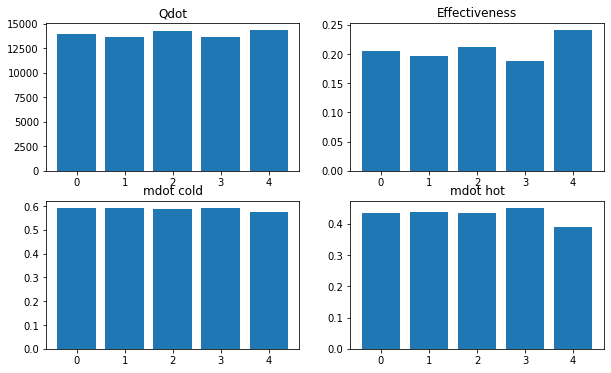

In [12]:

# plot a bar chart

fig, ax = plt.subplots(2, 2)

ax[0, 0].bar(range(len(Qdots)), Qdots)
ax[0, 0].set_title("Qdot")

ax[0, 1].bar(range(len(effs)), effs)
ax[0, 1].set_title("Effectiveness")

ax[1, 0].bar(range(len(mdot_colds)), mdot_colds)
ax[1, 0].set_title("mdot cold")

ax[1, 1].bar(range(len(mdot_hots)), mdot_hots)
ax[1, 1].set_title("mdot hot")

plt.show()
